In [12]:
import pandas as pd

# read the json file into a dataframe
df = pd.read_json('your_posts_1.json')

df.head()

,timestamp,attachments,data,title,tags
0,2020-12-10 08:06:43,[],"[{'post': 'Netflix Peace Travel ðªðª'}, {'...",NaN,NaN
1,2020-12-06 08:15:39,[],"[{'post': 'My type of ""Mein Tera"" ð'}, {'up...",NaN,NaN
2,2020-12-04 08:55:14,[],"[{'post': 'DBMS a 1NF, 2NF, 3NF er bodole Bang...",NaN,NaN
3,2020-12-02 13:56:55,[{'data': [{'text': 'https://www.facebook.com/...,[{'post': 'Matha akhon reverse flow te jacche ...,Fatima Jahara was watching TENET.,NaN
4,2020-12-01 13:31:22,[],[{'update_timestamp': 1606829482}],Fatima Jahara shared a video from the playlist...,NaN


In [13]:
# rename the timestamp column
df.rename(columns={'timestamp': 'date'}, inplace=True)

#drop some unnecessary columns
df = df.drop(['attachments', 'title', 'tags'], axis=1)

# making sure it's datetime format
pd.to_datetime(df['date'])

df.head(3)

,date,data
0,2020-12-10 08:06:43,"[{'post': 'Netflix Peace Travel ðªðª'}, {'..."
1,2020-12-06 08:15:39,"[{'post': 'My type of ""Mein Tera"" ð'}, {'up..."
2,2020-12-04 08:55:14,"[{'post': 'DBMS a 1NF, 2NF, 3NF er bodole Bang..."


In [14]:
print(df.shape)

(1479, 2)


In [ ]:
df = df.set_index('date')

In [19]:
post_counts = df['data'].resample('YS').size()
post_counts

date
2014-01-01      6
2015-01-01    118
2016-01-01    269
2017-01-01    496
2018-01-01    286
2019-01-01    190
2020-01-01    114
Freq: AS-JAN, Name: data, dtype: int64

In [50]:
post_counts_m = df['data'].resample('MS').size()
post_counts_m

date
2014-12-01     6
2015-01-01     4
2015-02-01     5
2015-03-01     1
2015-04-01     2
              ..
2020-08-01     6
2020-09-01     7
2020-10-01    13
2020-11-01     3
2020-12-01     5
Freq: MS, Name: data, Length: 73, dtype: int64

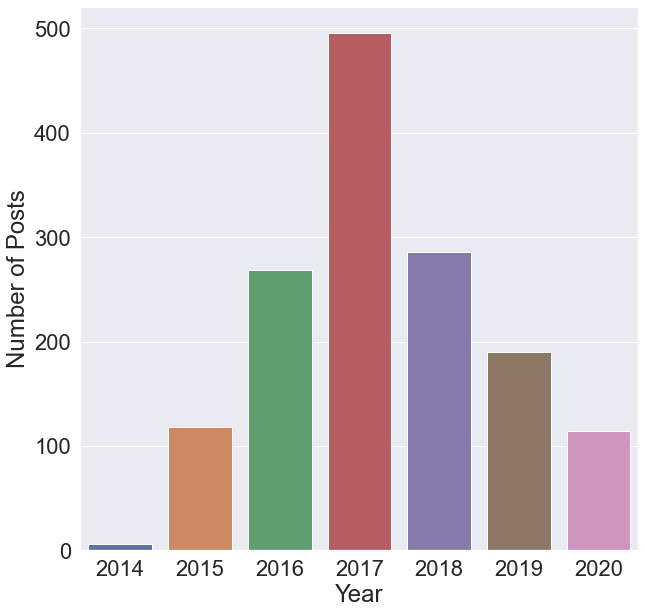

In [54]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.ticker import ScalarFormatter

# set figure size and font size
# sns.set(rc={'figure.figsize':(20,20)})
sns.set(font_scale=2)
fig = plt.figure(figsize = (10,10))

x_labels = post_counts.index

sns.barplot(x_labels, post_counts)
plt.xlabel('Year')
plt.ylabel('Number of Posts')
tick_positions = np.arange(len(x_labels))

plt.xticks(tick_positions, x_labels[tick_positions].strftime("%Y"))

plt.show()

In [ ]:
# import matplotlib.pyplot as plt
# %matplotlib inline
# import numpy as np
# from matplotlib.ticker import ScalarFormatter

# plt.rcParams["font.family"] = "Times New Roman"
# plt.rcParams["font.size"] = 26
# fig = plt.figure(figsize = (12, 12))
# barwidth = 0.30

# months = post_counts_m.index
# r1 = np.arange(len(months))

# year = post_counts_m.index
# #r2 = [x + barwidth for x in r1]
# # index = ['Uni-gram', 'Bi-gram', 'Tri-gram', 'Uni-gram+bi-gram', 'Uni-gram+bi-gram+tri-gram', 'HMM', 'TnT', 'CRF', 'Brill+uni-gram', 'Brill+bi-gram', 'Brill+tri-gram', 'Brill+uni-gram+bi-gram', 'Brill+uni-gram+bi-gram+tri-gram', 'Brill+HMM', 'Brill+TnT', 'Brill+CRF']

# plt.bar(r1-barwidth/2, exe_30, label="30 Tagset", color = 'orange', width = barwidth, edgecolor = 'white')
# plt.bar(r1+barwidth/2, exe_11, label="11 Tagset",  width = barwidth, edgecolor = 'white')

# plt.ylabel('Log(Execution time(s))')

# plt.xticks([r for r in range(len(acc_30))], index, rotation = 90)
# plt.yticks([0,1,10, 100,150])

# plt.yscale("log")
# plt.gca().yaxis.set_major_formatter(ScalarFormatter())
# plt.legend()
# plt.savefig('execution.png', dpi=100, bbox_inches='tight')
# plt.show()

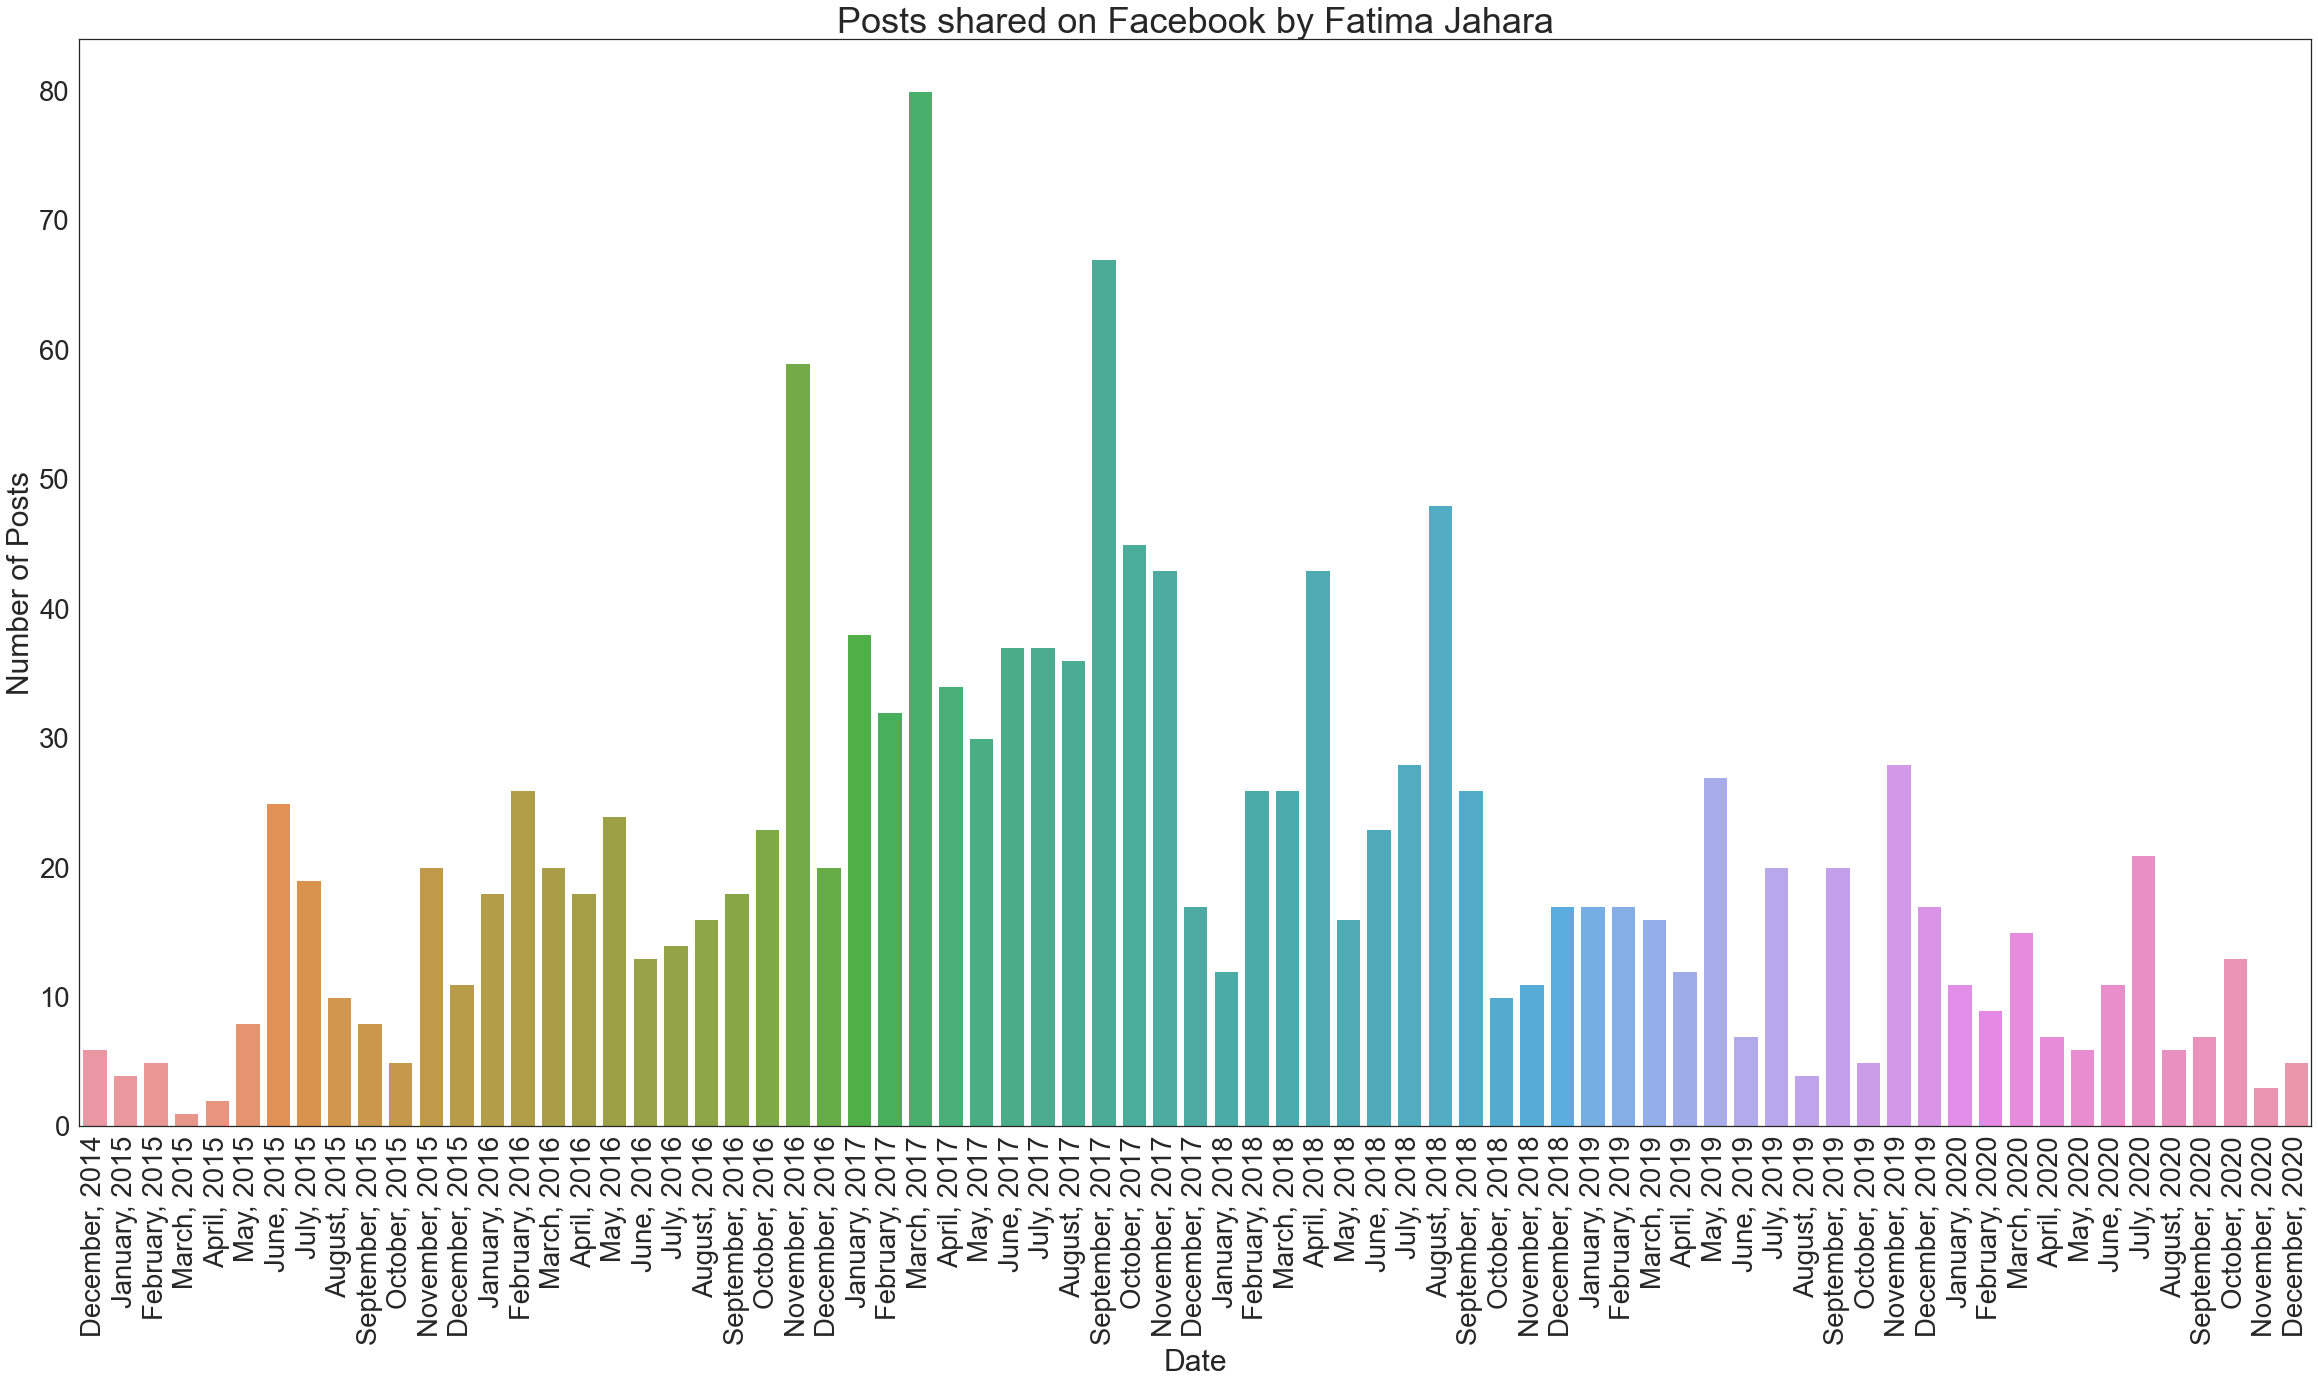

In [70]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# plt.rcParams["font.family"] = "Times New Roman"
# plt.rcParams["font.size"] = 26
# set figure size and font size
sns.set(rc={'figure.figsize':(40,20)})
# sns.set(font_scale=2.5)

# set x labels
x_labels = post_counts_m.index

#create bar plot
sns.set_style('white') 
sns.barplot(x_labels, post_counts_m)

sns.set(context='notebook', style='darkgrid', palette='deep', font='Times New Roman', font_scale=3, color_codes=False, rc=None)

# only show x-axis labels for Jan 1 of every other year
tick_positions = np.arange(len(x_labels))
plt.xlabel('Date')
plt.ylabel('Number of Posts')
plt.title('Posts shared on Facebook by Fatima Jahara')
#reformat date to display year onlyplt.ylabel("post counts")
plt.xticks(tick_positions, x_labels[tick_positions].strftime("%B, %Y"), rotation =90)
plt.savefig('facebook_post(month).png', dpi=100, bbox_inches='tight')
# display the plot
plt.show()